# Heatmap of different oscillators

In [1]:
import numpy as np
from simple.plotly import chartFigure
from simple.funcs import symlog, vPIN, cPIN, tickSpeed
from simple.pretty import pmap
from simple.jurik import JRSX, JTPO, JCFB
from simple.ehlers import reflex
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.subplot.left'] = 0.04
plt.rcParams['figure.subplot.right'] = 0.96
plt.rcParams['figure.subplot.top'] = 0.96
plt.rcParams['figure.subplot.bottom'] = 0.04
plt.rcParams['axes.grid'] = False

In [3]:
T = np.load('data/ETHUSDT.2022-05-08.tick.npz')['ETHUSDT'].view(np.recarray)
len(T)

95820

In [4]:
Buy = T[T.VolumeA > 0]
Sell = T[T.VolumeA < 0]
Buy[:5]

rec.array([('2022-05-08T00:01:00.335000', 0, 2636.,  6.),
           ('2022-05-08T00:01:00.335000', 1, 2636.,  4.),
           ('2022-05-08T00:01:00.668000', 2, 2636., 96.),
           ('2022-05-08T00:01:00.668000', 3, 2636.,  2.),
           ('2022-05-08T00:01:00.668000', 4, 2636.,  2.)],
          dtype={'names':['DateTimeA','LocalTimeA','PriceA','VolumeA'], 'formats':['<M8[us]','<i8','<f8','<f8'], 'offsets':[0,8,16,24], 'itemsize':40})

In [5]:
# indexed chart without bidask
fig = chartFigure(rows=2, height=500,
    Sell=dict(x=Sell.LocalTimeA, y=Sell.PriceA, color='red', mode='markers', size=-symlog(Sell.VolumeA)+3, opacity=0.2),
    Buy=dict(x=Buy.LocalTimeA, y=Buy.PriceA, color='green', mode='markers', size=symlog(Buy.VolumeA)+3, opacity=0.2),
    Speed=dict(y=tickSpeed(T, 3000), row=2)
)
fig

FigureWidgetResampler({
    'data': [{'marker': {'color': 'red',
                         'opacity': 0.2,
    …

In [6]:
P = range(3, 600, 3)
k = 120
VPIN = pmap(lambda period: vPIN(T, period*10)[::k], P)
CPIN = pmap(lambda period: cPIN(T, period*10)[::k], P)
SP = pmap(lambda period: tickSpeed(T, period*10)[::k], P)
RSX = pmap(lambda period: JRSX(T.PriceA, period*10)[::k], P)
CFB = pmap(lambda period: JCFB(T.PriceA, 7, period*10)[::k], P)

RF = pmap(lambda period: reflex(T.PriceA, period*10)[::k], P)

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

In [7]:
TPO = pmap(lambda period: JTPO(T.PriceA, period*10)[::k], P)

  0%|          | 0/199 [00:00<?, ?it/s]

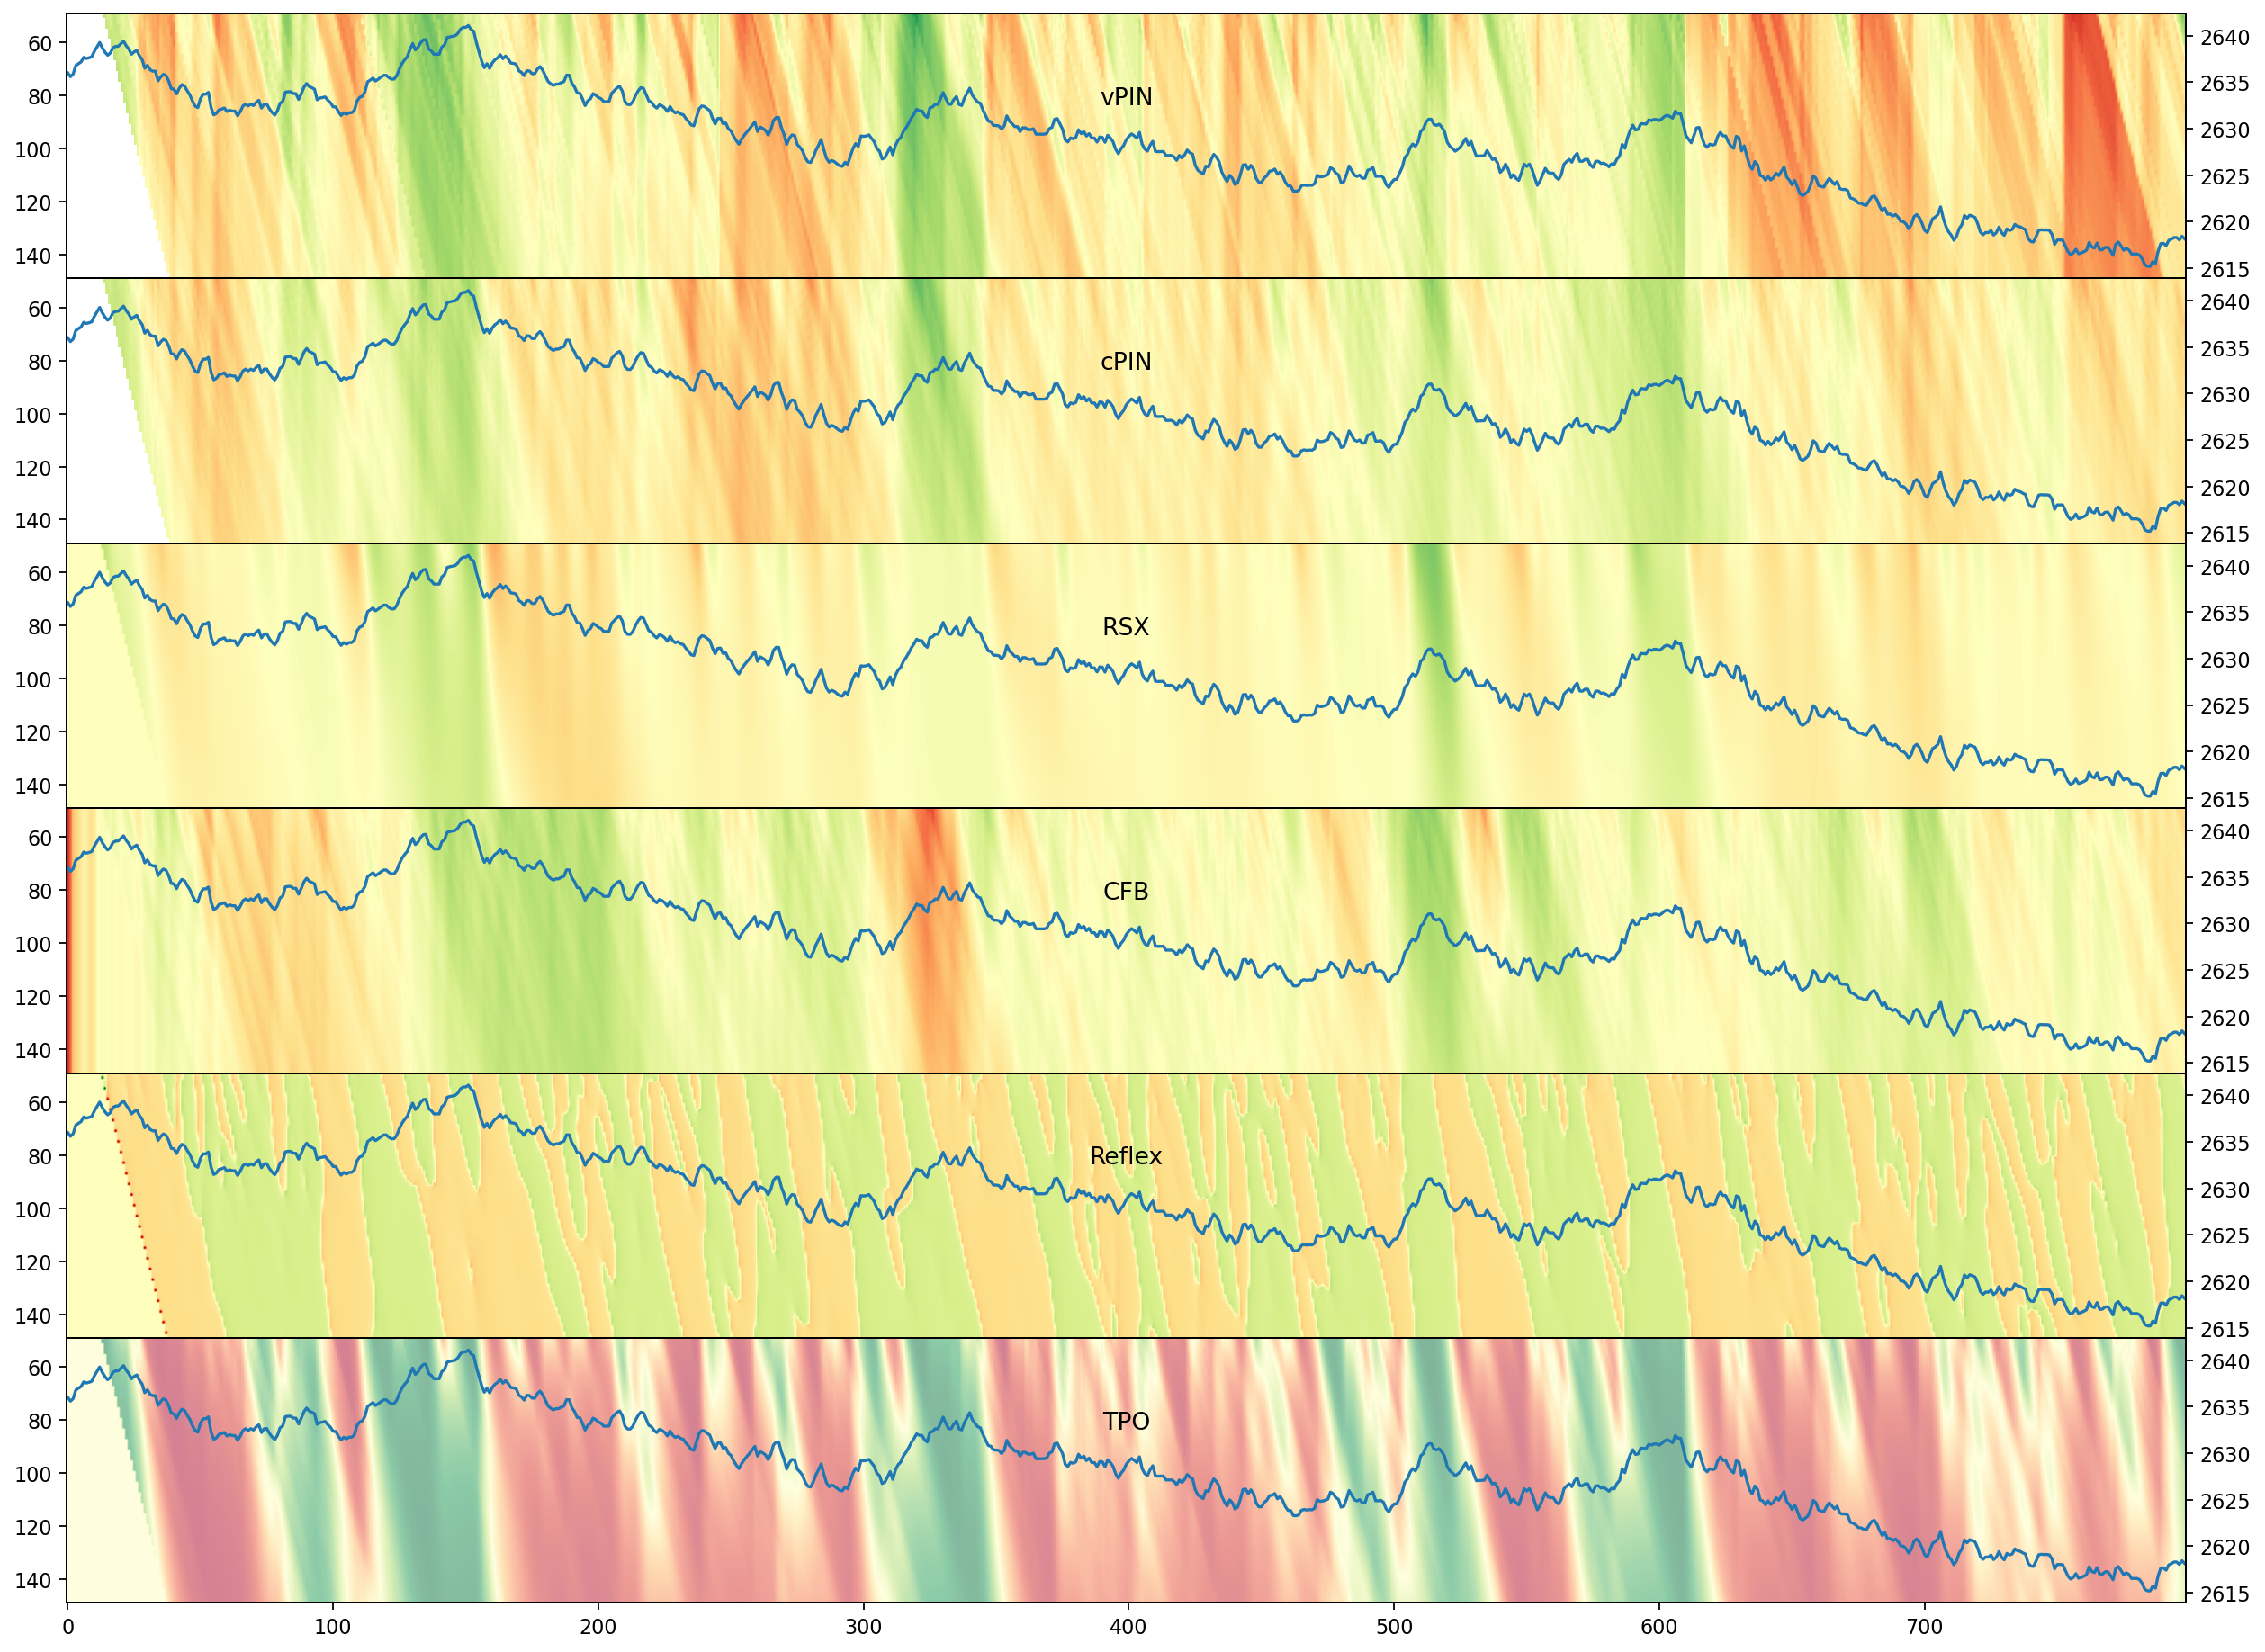

In [26]:
N = 6

fig, ax = plt.subplots(N, 1, figsize=(16, 12), sharex='col')
fig.subplots_adjust(hspace=0)
ax[0].imshow(VPIN, cmap='RdYlGn')
ax[0].set_title('vPIN', y=0.99)

ax[1].imshow(CPIN, cmap='RdYlGn')
ax[1].set_title('cPIN', y=0.99)

ax[2].imshow(RSX, cmap='RdYlGn')
ax[2].set_title('RSX', y=0.99)

ax[3].imshow(CFB, cmap='RdYlGn')
ax[3].set_title('CFB', y=0.99)

ax[4].imshow(RF, cmap='RdYlGn')
ax[4].set_title('Reflex', y=0.99)

ax[5].imshow(TPO, cmap='RdYlGn', alpha=0.5)
ax[5].set_title('TPO', y=0.99)

[ax[t].twinx().plot(T.PriceA[::k]) for t in range(N)];